# **Prediksi Waktu Pengiriman E-commerce Amazon**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('amazon_delivery.csv')

In [ ]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


## Pre-Processing

### Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [ ]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [ ]:
df.dropna(subset=['Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.7+ MB


### Drop duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.7+ MB


In [ ]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [ ]:
df = df.drop(['Order_ID','Order_Date'], axis=1)

## Exploratory Data Analysis

### Handling Outliers

In [ ]:
features  = list(df)[:-1]
features

['Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time']

In [ ]:
numerical_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
                      'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']



In [ ]:
features  = list(numerical_features)
features

['Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Delivery_Time']

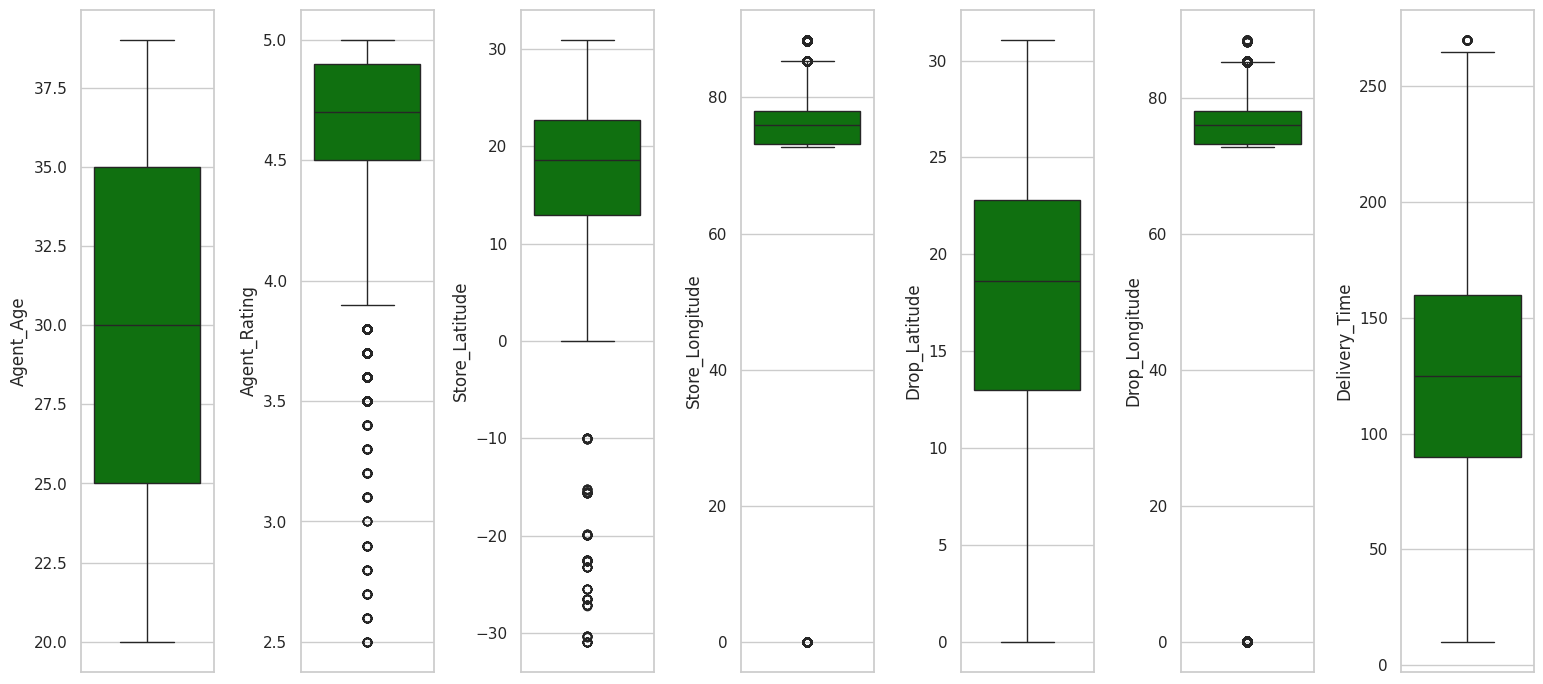

In [ ]:
plt.figure(figsize=(20, 7))
for i in range(0, len(features)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=features[i],data=df,color='green')
    plt.tight_layout()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Daftar fitur yang ingin Anda periksa untuk outlier
features_with_outliers = ['Agent_Rating',  'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude', 'Delivery_Time']

# Menghapus outlier untuk setiap fitur
for feature in features_with_outliers:
    df = remove_outliers_iqr(df, feature)

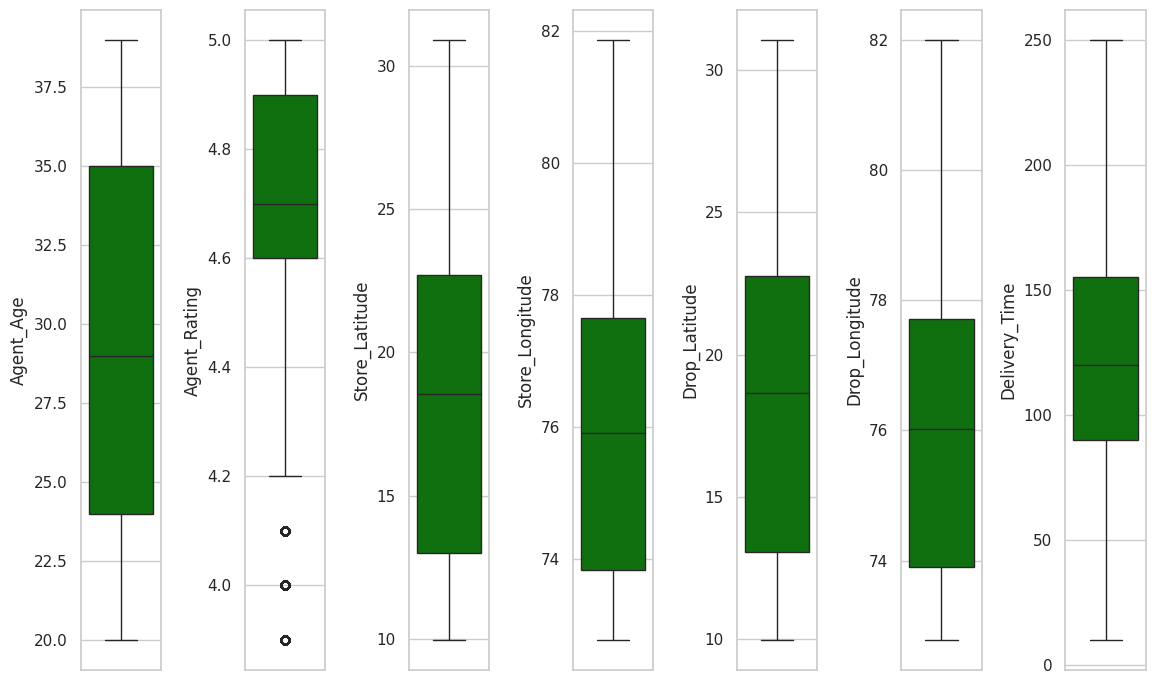

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=features[i],data=df,color='green')
    plt.tight_layout()

### Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35654 entries, 0 to 43737
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        35654 non-null  int64  
 1   Agent_Rating     35654 non-null  float64
 2   Store_Latitude   35654 non-null  float64
 3   Store_Longitude  35654 non-null  float64
 4   Drop_Latitude    35654 non-null  float64
 5   Drop_Longitude   35654 non-null  float64
 6   Order_Time       35654 non-null  object 
 7   Pickup_Time      35654 non-null  object 
 8   Weather          35654 non-null  object 
 9   Traffic          35654 non-null  object 
 10  Vehicle          35654 non-null  object 
 11  Area             35654 non-null  object 
 12  Delivery_Time    35654 non-null  int64  
 13  Category         35654 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.1+ MB


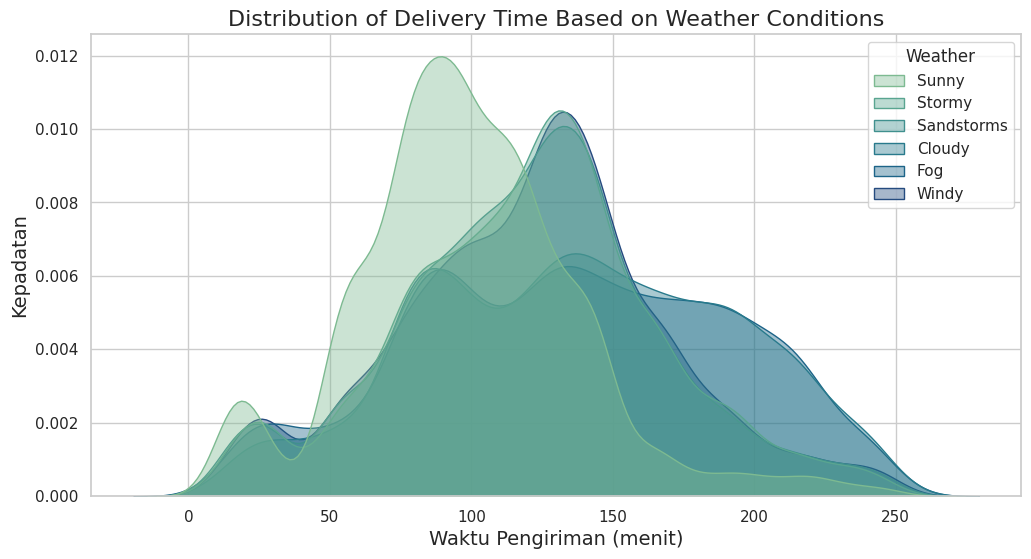

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Delivery_Time', hue='Weather', fill=True, common_norm=False, alpha=0.4, palette='crest')
plt.title('Distribution of Delivery Time Based on Weather Conditions', fontsize=16)
plt.xlabel('Waktu Pengiriman (menit)', fontsize=14)
plt.ylabel('Kepadatan', fontsize=14)
plt.grid(True)
plt.show()

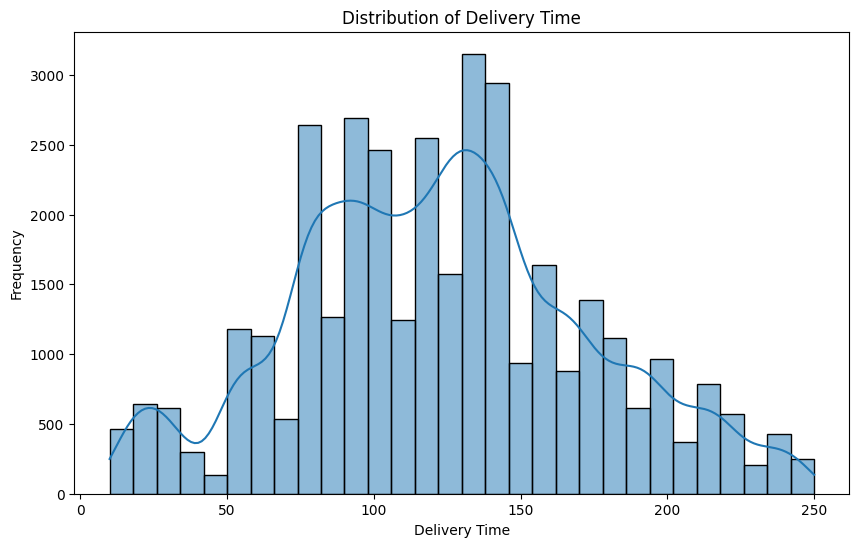

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

<ipython-input-22-0237351589c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather', data=df, palette='pastel')  # Menggunakan palet warna 'pastel'


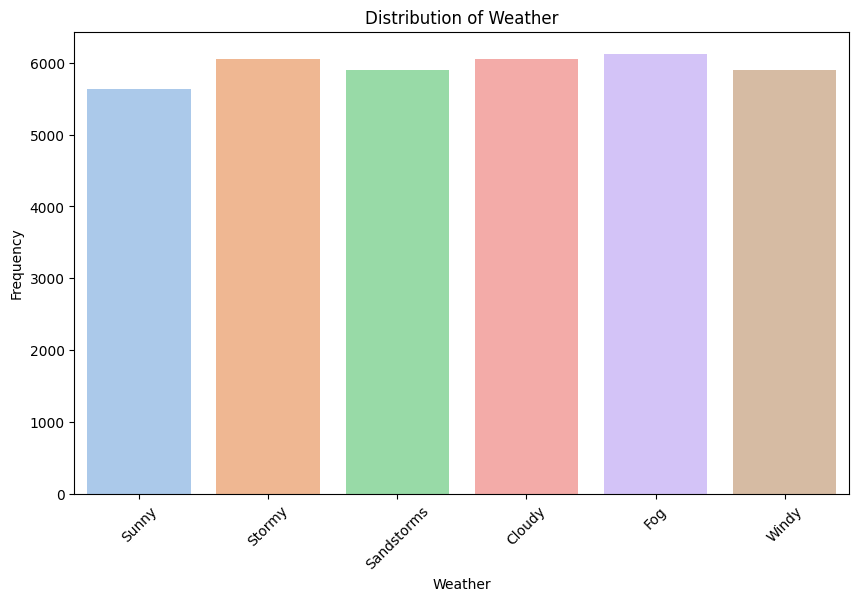

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=df, palette='pastel')  # Menggunakan palet warna 'pastel'
plt.title('Distribution of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

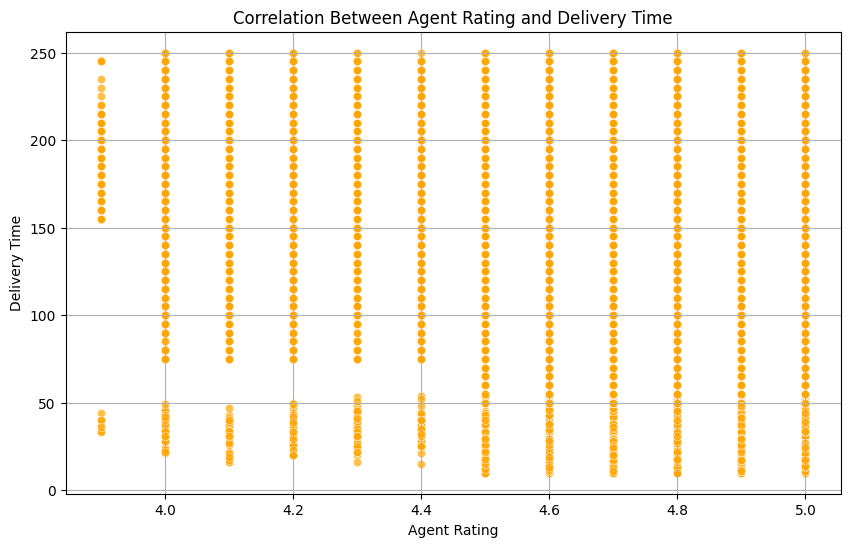

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df, color='orange', alpha=0.7)
plt.title('Correlation Between Agent Rating and Delivery Time')
plt.xlabel('Agent Rating')
plt.ylabel('Delivery Time')
plt.grid(True)
plt.show()

In [ ]:
numerical_features = df[['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
                         'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']]




<ipython-input-123-56bf80fba74b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic', y='Delivery_Time', data=df, palette='muted')


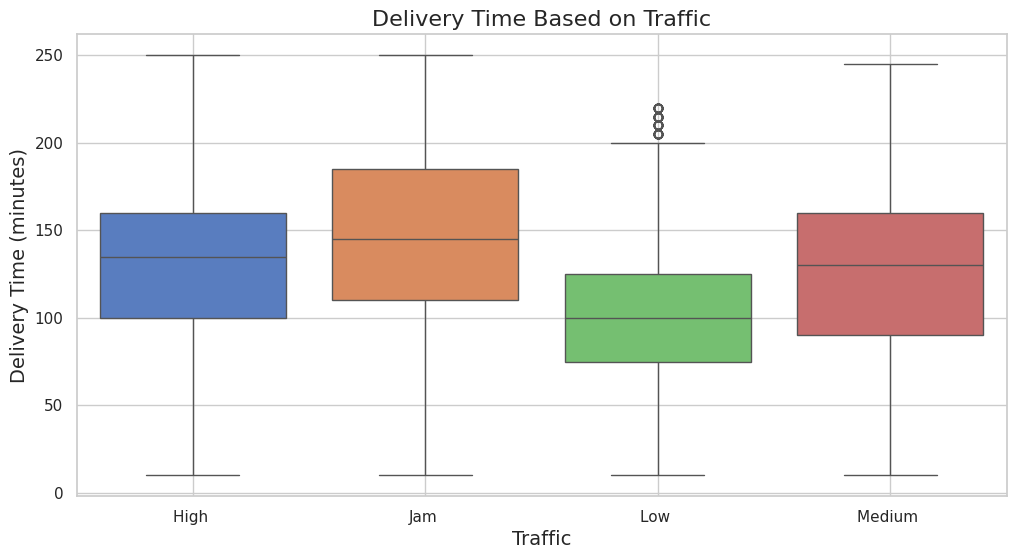

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, palette='muted')
plt.title('Delivery Time Based on Traffic', fontsize=16)
plt.xlabel('Traffic', fontsize=14)
plt.ylabel('Delivery Time (minutes)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
df['Delivery_Time'].describe()

,Delivery_Time
count,35654.000000
mean,122.806193
std,50.320654
min,10.000000
25%,90.000000
50%,120.000000
75%,155.000000
max,250.000000


In [ ]:
df

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,26.469003,80.316344,26.539003,80.386344,18:10:00,18:25:00,Cloudy,Medium,motorcycle,Metropolitian,210,Apparel
43732,28,4.9,13.029198,77.570997,13.059198,77.600997,21:55:00,22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home


## Feature Engineering

### New Column : Distance_km

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


df['Distance_km'] = df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'],
                                                   row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

In [ ]:
df['Distance_km'] = df['Distance_km'].round(2)

In [ ]:
df

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.03
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.18
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.55
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.79
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,26.469003,80.316344,26.539003,80.386344,18:10:00,18:25:00,Cloudy,Medium,motorcycle,Metropolitian,210,Apparel,10.45
43732,28,4.9,13.029198,77.570997,13.059198,77.600997,21:55:00,22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys,4.66
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.49
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.66


### Encoding Traffic

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


traffic_order = ['Low', 'Medium', 'High', 'Jam']
encoder = OrdinalEncoder(categories=[traffic_order])



In [ ]:
df['Traffic'] = df['Traffic'].str.strip()

In [ ]:
df['Traffic_encoded'] = encoder.fit_transform(df[['Traffic']])

In [ ]:
df['Traffic'].value_counts()

,count
Traffic,
Low,12297
Jam,10973
Medium,8808
High,3576


### New Feature : Pickup_Time

In [ ]:
df['Pickup_Time'] = pd.to_timedelta(df['Pickup_Time'])
df['Order_Time'] = pd.to_timedelta(df['Order_Time'])



In [ ]:
df['pickup_time'] = df['Pickup_Time']-df['Order_Time']

In [ ]:
unwanted_cols = ['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Traffic']
df.drop(unwanted_cols, inplace=True, axis=1)

In [ ]:
df


,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.03,2.0,0 days 00:15:00
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.18,3.0,0 days 00:05:00
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.55,0.0,0 days 00:15:00
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.79,1.0,0 days 00:10:00
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.21,2.0,0 days 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,Cloudy,motorcycle,Metropolitian,210,Apparel,10.45,1.0,0 days 00:15:00
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,Sandstorms,scooter,Metropolitian,145,Toys,4.66,3.0,0 days 00:05:00
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,Windy,motorcycle,Metropolitian,160,Home,1.49,2.0,0 days 00:10:00
43736,30,4.9,0 days 23:50:00,0 days 00:05:00,Cloudy,scooter,Metropolitian,80,Home,4.66,0.0,-1 days +00:15:00


In [ ]:
df['pickup_time'] = df.pickup_time.astype(str).str.replace('0 days ', '')


In [ ]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.03,2.0,00:15:00
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.18,3.0,00:05:00
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.55,0.0,00:15:00
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.79,1.0,00:10:00
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.21,2.0,00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,Cloudy,motorcycle,Metropolitian,210,Apparel,10.45,1.0,00:15:00
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,Sandstorms,scooter,Metropolitian,145,Toys,4.66,3.0,00:05:00
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,Windy,motorcycle,Metropolitian,160,Home,1.49,2.0,00:10:00
43736,30,4.9,0 days 23:50:00,0 days 00:05:00,Cloudy,scooter,Metropolitian,80,Home,4.66,0.0,-1 days +00:15:00


In [ ]:
df.dtypes

,0
Agent_Age,int64
Agent_Rating,float64
Order_Time,timedelta64[ns]
Pickup_Time,timedelta64[ns]
Weather,object
Vehicle,object
Area,object
Delivery_Time,int64
Category,object
Distance_km,float64


In [ ]:
df['checking'] = df['pickup_time'].str.contains('days', na=False)


In [ ]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.03,2.0,00:15:00,False
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.18,3.0,00:05:00,False
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.55,0.0,00:15:00,False
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.79,1.0,00:10:00,False
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.21,2.0,00:15:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,Cloudy,motorcycle,Metropolitian,210,Apparel,10.45,1.0,00:15:00,False
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,Sandstorms,scooter,Metropolitian,145,Toys,4.66,3.0,00:05:00,False
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,Windy,motorcycle,Metropolitian,160,Home,1.49,2.0,00:10:00,False
43736,30,4.9,0 days 23:50:00,0 days 00:05:00,Cloudy,scooter,Metropolitian,80,Home,4.66,0.0,-1 days +00:15:00,True


In [ ]:
df = df[~df['checking']]

In [ ]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.03,2.0,00:15:00,False
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.18,3.0,00:05:00,False
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.55,0.0,00:15:00,False
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.79,1.0,00:10:00,False
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.21,2.0,00:15:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,Sandstorms,van,Metropolitian,100,Clothing,3.10,0.0,00:15:00,False
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,Cloudy,motorcycle,Metropolitian,210,Apparel,10.45,1.0,00:15:00,False
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,Sandstorms,scooter,Metropolitian,145,Toys,4.66,3.0,00:05:00,False
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,Windy,motorcycle,Metropolitian,160,Home,1.49,2.0,00:10:00,False


In [ ]:
pt = df['pickup_time']

In [ ]:
pt

,pickup_time
0,00:15:00
1,00:05:00
2,00:15:00
3,00:10:00
4,00:15:00
...,...
43730,00:15:00
43731,00:15:00
43732,00:05:00
43734,00:10:00


In [ ]:
a= pt.str.split(':')
a=pt.str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


In [ ]:
f = a.rename("pickup_time(min)")

In [ ]:
f

,pickup_time(min)
0,15
1,5
2,15
3,10
4,15
...,...
43730,15
43731,15
43732,5
43734,10


In [ ]:
df_new = pd.concat([df, f], axis=1)
df_new

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking,pickup_time(min)
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.03,2.0,00:15:00,False,15
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.18,3.0,00:05:00,False,5
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.55,0.0,00:15:00,False,15
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.79,1.0,00:10:00,False,10
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.21,2.0,00:15:00,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,Sandstorms,van,Metropolitian,100,Clothing,3.10,0.0,00:15:00,False,15
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,Cloudy,motorcycle,Metropolitian,210,Apparel,10.45,1.0,00:15:00,False,15
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,Sandstorms,scooter,Metropolitian,145,Toys,4.66,3.0,00:05:00,False,5
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,Windy,motorcycle,Metropolitian,160,Home,1.49,2.0,00:10:00,False,10


In [ ]:
df = df_new

In [ ]:
df.dtypes

,0
Agent_Age,int64
Agent_Rating,float64
Order_Time,timedelta64[ns]
Pickup_Time,timedelta64[ns]
Weather,object
Vehicle,object
Area,object
Delivery_Time,int64
Category,object
Distance_km,float64


### Encoding Vehicle

In [ ]:
df['Vehicle'].value_counts()


,count
Vehicle,
motorcycle,20546
scooter,11650
van,2793


In [ ]:
df["Vehicle"] = df["Vehicle"].astype('category')
df.dtypes


,0
Agent_Age,int64
Agent_Rating,float64
Order_Time,timedelta64[ns]
Pickup_Time,timedelta64[ns]
Weather,object
Vehicle,category
Area,object
Delivery_Time,int64
Category,object
Distance_km,float64


In [ ]:
df["Vehicle"] = df["Vehicle"].cat.codes
df.head()

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking,pickup_time(min)
0,37,4.9,0 days 11:30:00,0 days 11:45:00,Sunny,0,Urban,120,Clothing,3.03,2.0,00:15:00,False,15
1,34,4.5,0 days 19:45:00,0 days 19:50:00,Stormy,1,Metropolitian,165,Electronics,20.18,3.0,00:05:00,False,5
2,23,4.4,0 days 08:30:00,0 days 08:45:00,Sandstorms,0,Urban,130,Sports,1.55,0.0,00:15:00,False,15
3,38,4.7,0 days 18:00:00,0 days 18:10:00,Sunny,0,Metropolitian,105,Cosmetics,7.79,1.0,00:10:00,False,10
4,32,4.6,0 days 13:30:00,0 days 13:45:00,Cloudy,1,Metropolitian,150,Toys,6.21,2.0,00:15:00,False,15


### Encoding Area & Weather

In [ ]:
df["Area"] = df["Area"].astype('category')
df["Weather"] = df["Weather"].astype('category')
df.dtypes

,0
Agent_Age,int64
Agent_Rating,float64
Order_Time,timedelta64[ns]
Pickup_Time,timedelta64[ns]
Weather,category
Vehicle,int8
Area,category
Delivery_Time,int64
Category,object
Distance_km,float64


In [ ]:
df['Weather'].value_counts()

,count
Weather,
Fog,6008
Cloudy,5943
Stormy,5920
Windy,5802
Sandstorms,5776
Sunny,5540


In [ ]:
df["Area"] = df["Area"].cat.codes
df["Weather"] = df["Weather"].cat.codes
df.head()

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking,pickup_time(min)
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,Clothing,3.03,2.0,00:15:00,False,15
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,Electronics,20.18,3.0,00:05:00,False,5
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,Sports,1.55,0.0,00:15:00,False,15
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,Cosmetics,7.79,1.0,00:10:00,False,10
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,Toys,6.21,2.0,00:15:00,False,15


In [ ]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking,pickup_time(min)
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,Clothing,3.03,2.0,00:15:00,False,15
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,Electronics,20.18,3.0,00:05:00,False,5
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,Sports,1.55,0.0,00:15:00,False,15
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,Cosmetics,7.79,1.0,00:10:00,False,10
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,Toys,6.21,2.0,00:15:00,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,2,2,0,100,Clothing,3.10,0.0,00:15:00,False,15
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,Apparel,10.45,1.0,00:15:00,False,15
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,Toys,4.66,3.0,00:05:00,False,5
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,Home,1.49,2.0,00:10:00,False,10


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34989 entries, 0 to 43737
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Agent_Age         34989 non-null  int64          
 1   Agent_Rating      34989 non-null  float64        
 2   Order_Time        34989 non-null  timedelta64[ns]
 3   Pickup_Time       34989 non-null  timedelta64[ns]
 4   Weather           34989 non-null  int8           
 5   Vehicle           34989 non-null  int8           
 6   Area              34989 non-null  int8           
 7   Delivery_Time     34989 non-null  int64          
 8   Category          34989 non-null  object         
 9   Distance_km       34989 non-null  float64        
 10  Traffic_encoded   34989 non-null  float64        
 11  pickup_time       34989 non-null  object         
 12  checking          34989 non-null  bool           
 13  pickup_time(min)  34989 non-null  int64          
dtypes: bool(1),

### Encoding Category
from 15 values into 4 Categories

In [ ]:
df['Category'].value_counts()

,count
Category,
Electronics,2282
Outdoors,2270
Jewelry,2249
Skincare,2236
Books,2229
Toys,2216
Apparel,2193
Snacks,2192
Shoes,2159


Kelompokkan menjadi 4 kategori

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Mengelompokkan data ke dalam kategori
def categorize_category(category):
    if category in ['Apparel', 'Clothing', 'Shoes', 'Jewelry']:
        return 'Fashion dan Aksesoris'
    elif category in ['Skincare', 'Cosmetics', 'Grocery', 'Snacks', 'Pet Supplies']:
        return 'Kebutuhan Sehari-hari dan Perawatan Diri'
    elif category in ['Electronics', 'Books', 'Toys', 'Sports', 'Outdoors']:
        return 'Elektronik, Buku, dan Hobi'
    elif category in ['Home', 'Kitchen']:
        return 'Rumah dan Dapur'
    else:
        return 'Lainnya'

# Menerapkan fungsi kategorisasi
df['Category Group'] = df['Category'].apply(categorize_category)

# Label Encoding pada kolom 'Category Group'
le = LabelEncoder()
df['Category Group Encoded'] = le.fit_transform(df['Category Group'])

# Menampilkan hasil
print(df)

       Agent_Age  Agent_Rating      Order_Time     Pickup_Time  Weather  \
0             37           4.9 0 days 11:30:00 0 days 11:45:00        4   
1             34           4.5 0 days 19:45:00 0 days 19:50:00        3   
2             23           4.4 0 days 08:30:00 0 days 08:45:00        2   
3             38           4.7 0 days 18:00:00 0 days 18:10:00        4   
4             32           4.6 0 days 13:30:00 0 days 13:45:00        0   
...          ...           ...             ...             ...      ...   
43730         37           4.8 0 days 09:35:00 0 days 09:50:00        2   
43731         30           4.2 0 days 18:10:00 0 days 18:25:00        0   
43732         28           4.9 0 days 21:55:00 0 days 22:00:00        2   
43734         30           4.8 0 days 11:35:00 0 days 11:45:00        5   
43737         20           4.7 0 days 13:35:00 0 days 13:40:00        0   

       Vehicle  Area  Delivery_Time     Category  Distance_km  \
0            0     3            12

In [ ]:
df

,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,Distance_km,Traffic_encoded,pickup_time,checking,pickup_time(min),Category Group,Category Group Encoded
0,37,4.9,0 days 11:30:00,0 days 11:45:00,4,0,3,120,Clothing,3.03,2.0,00:15:00,False,15,Fashion dan Aksesoris,1
1,34,4.5,0 days 19:45:00,0 days 19:50:00,3,1,0,165,Electronics,20.18,3.0,00:05:00,False,5,"Elektronik, Buku, dan Hobi",0
2,23,4.4,0 days 08:30:00,0 days 08:45:00,2,0,3,130,Sports,1.55,0.0,00:15:00,False,15,"Elektronik, Buku, dan Hobi",0
3,38,4.7,0 days 18:00:00,0 days 18:10:00,4,0,0,105,Cosmetics,7.79,1.0,00:10:00,False,10,Kebutuhan Sehari-hari dan Perawatan Diri,2
4,32,4.6,0 days 13:30:00,0 days 13:45:00,0,1,0,150,Toys,6.21,2.0,00:15:00,False,15,"Elektronik, Buku, dan Hobi",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43730,37,4.8,0 days 09:35:00,0 days 09:50:00,2,2,0,100,Clothing,3.10,0.0,00:15:00,False,15,Fashion dan Aksesoris,1
43731,30,4.2,0 days 18:10:00,0 days 18:25:00,0,0,0,210,Apparel,10.45,1.0,00:15:00,False,15,Fashion dan Aksesoris,1
43732,28,4.9,0 days 21:55:00,0 days 22:00:00,2,1,0,145,Toys,4.66,3.0,00:05:00,False,5,"Elektronik, Buku, dan Hobi",0
43734,30,4.8,0 days 11:35:00,0 days 11:45:00,5,0,0,160,Home,1.49,2.0,00:10:00,False,10,Rumah dan Dapur,3


In [ ]:
unwanted_cols = ['Category','pickup_time','checking','Category Group','Order_Time','Pickup_Time']
df.drop(unwanted_cols, inplace=True, axis=1)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,pickup_time(min),Category Group Encoded
0,37,4.9,4,0,3,120,3.03,2.0,15,1
1,34,4.5,3,1,0,165,20.18,3.0,5,0
2,23,4.4,2,0,3,130,1.55,0.0,15,0
3,38,4.7,4,0,0,105,7.79,1.0,10,2
4,32,4.6,0,1,0,150,6.21,2.0,15,0
...,...,...,...,...,...,...,...,...,...,...
34984,37,4.8,2,2,0,100,3.10,0.0,15,1
34985,30,4.2,0,0,0,210,10.45,1.0,15,1
34986,28,4.9,2,1,0,145,4.66,3.0,5,0
34987,30,4.8,5,0,0,160,1.49,2.0,10,3


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,
scaler = StandardScaler()
df[['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle',
    'Area', 'Distance_km', 'Traffic_encoded', 'pickup_time(min)']] = scaler.fit_transform(
    df[['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle',
        'Area', 'Distance_km', 'Traffic_encoded', 'pickup_time(min)']]
)


# Menampilkan hasil
print("DataFrame setelah transformasi:")
print(df)

DataFrame setelah transformasi:
       Agent_Age  Agent_Rating  Weather  Vehicle  Area  Delivery_Time  \
0       0.894737      0.909091      0.8      0.0   1.0            120   
1       0.736842      0.545455      0.6      0.5   0.0            165   
2       0.157895      0.454545      0.4      0.0   1.0            130   
3       0.947368      0.727273      0.8      0.0   0.0            105   
4       0.631579      0.636364      0.0      0.5   0.0            150   
...          ...           ...      ...      ...   ...            ...   
34984   0.894737      0.818182      0.4      1.0   0.0            100   
34985   0.526316      0.272727      0.0      0.0   0.0            210   
34986   0.421053      0.909091      0.4      0.5   0.0            145   
34987   0.526316      0.818182      1.0      0.0   0.0            160   
34988   0.000000      0.727273      0.0      0.0   0.0            130   

       Distance_km  Traffic_encoded  pickup_time(min)  Category Group Encoded  
0         0

## Modelling and Evaluation

### Splitting Data


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34989 entries, 0 to 34988
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Agent_Age               34989 non-null  float64
 1   Agent_Rating            34989 non-null  float64
 2   Weather                 34989 non-null  float64
 3   Vehicle                 34989 non-null  float64
 4   Area                    34989 non-null  float64
 5   Delivery_Time           34989 non-null  int64  
 6   Distance_km             34989 non-null  float64
 7   Traffic_encoded         34989 non-null  float64
 8   pickup_time(min)        34989 non-null  float64
 9   Category Group Encoded  34989 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.7 MB


In [ ]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle', 'Area',
       'Delivery_Time', 'Distance_km', 'Traffic_encoded', 'pickup_time(min)',
       'Category Group Encoded'],
      dtype='object')

In [ ]:
df_new = df

In [ ]:
df_new.reset_index()

,index,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Delivery_Time,Distance_km,Traffic_encoded,pickup_time(min),Category Group Encoded
0,0,0.894737,0.909091,0.8,0.0,1.0,120,0.080000,0.666667,1.0,1
1,1,0.736842,0.545455,0.6,0.5,0.0,165,0.959487,1.000000,0.0,0
2,2,0.157895,0.454545,0.4,0.0,1.0,130,0.004103,0.000000,1.0,0
3,3,0.947368,0.727273,0.8,0.0,0.0,105,0.324103,0.333333,0.5,2
4,4,0.631579,0.636364,0.0,0.5,0.0,150,0.243077,0.666667,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
34984,34984,0.894737,0.818182,0.4,1.0,0.0,100,0.083590,0.000000,1.0,1
34985,34985,0.526316,0.272727,0.0,0.0,0.0,210,0.460513,0.333333,1.0,1
34986,34986,0.421053,0.909091,0.4,0.5,0.0,145,0.163590,1.000000,0.0,0
34987,34987,0.526316,0.818182,1.0,0.0,0.0,160,0.001026,0.666667,0.5,3


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_new.drop(columns='Delivery_Time')
target = df_new[['Delivery_Time']]

feature_df_new_train, feature_df_new_test, target_df_new_train, target_df_new_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
train_shape = feature_df_new_train.shape
test_shape = feature_df_new_test.shape

# Menampilkan hasil
print(f"Jumlah baris dan kolom pada data train: {train_shape}")
print(f"Jumlah baris dan kolom pada data test: {test_shape}")

Jumlah baris dan kolom pada data train: (27991, 9)
Jumlah baris dan kolom pada data test: (6998, 9)


In [ ]:
print(feature_df_new_train.dtypes)

Agent_Age                 float64
Agent_Rating              float64
Weather                   float64
Vehicle                   float64
Area                      float64
Distance_km               float64
Traffic_encoded           float64
pickup_time(min)          float64
Category Group Encoded      int64
dtype: object


In [ ]:
feature_df_new_train.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Vehicle', 'Area',
       'Distance_km', 'Traffic_encoded', 'pickup_time(min)',
       'Category Group Encoded'],
      dtype='object')

In [ ]:
feature_df_new_train


,Agent_Age,Agent_Rating,Weather,Vehicle,Area,Distance_km,Traffic_encoded,pickup_time(min),Category Group Encoded
13832,0.473684,1.000000,0.8,0.0,0.0,0.460000,1.000000,1.0,0
5484,0.842105,0.727273,0.6,0.5,0.0,0.622564,0.000000,0.0,2
15232,0.789474,0.727273,0.2,0.0,0.0,0.404615,0.333333,0.0,0
26137,0.000000,0.272727,0.4,0.0,0.0,0.563590,1.000000,1.0,2
4034,0.789474,0.818182,0.2,0.0,0.0,0.312821,0.333333,1.0,0
...,...,...,...,...,...,...,...,...,...
16850,0.000000,0.727273,1.0,0.0,0.0,0.240000,0.666667,1.0,2
6265,0.684211,0.181818,0.4,0.5,0.0,0.397436,1.000000,0.0,1
11284,0.210526,0.636364,0.4,0.0,0.0,0.563590,0.333333,0.5,1
860,1.000000,0.454545,0.4,0.0,0.0,0.157436,0.333333,0.5,3


MultiCollinearity Study

### Ridge Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Mengasumsikan df_new adalah DataFrame Anda
X = df_new.drop(columns=['Delivery_Time'])  # Menghapus kolom target dari fitur
y = df_new['Delivery_Time']  # Target (waktu pengiriman)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Ridge
ridge_model = Ridge(alpha=1.0)  # Anda bisa mencoba beberapa nilai alpha
ridge_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge): {mse_ridge}")

# Menampilkan koefisien fitur
coefficients = pd.Series(ridge_model.coef_, index=X.columns)
print("Koefisien Fitur:")
print(coefficients)

Mean Squared Error (Ridge): 1640.884254214575
Koefisien Fitur:
Agent_Age                 39.398255
Agent_Rating             -43.626615
Weather                  -25.587156
Vehicle                  -18.537303
Area                     -11.749503
Distance_km               33.017620
Traffic_encoded           35.404557
pickup_time(min)          -0.363540
Category Group Encoded    -4.656153
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mengasumsikan df_new adalah DataFrame Anda
X = df_new.drop(columns=['Delivery_Time'])  # Menghapus kolom target dari fitur
y = df_new['Delivery_Time']  # Target (waktu pengiriman)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Ridge
ridge_model = Ridge(alpha=1.0)  # Anda bisa mencoba beberapa nilai alpha
ridge_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = ridge_model.predict(X_test)

# Menghitung metrik kesalahan
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100

# Mean Error (ME)
mean_error = (y_test - y_pred).mean()

# Mean Percentage Error (MPE)
mpe = (y_test - y_pred).mean() / y_test.mean() * 100

# Mean Absolute Scaled Error (MASE)
naive_forecast = y_test.shift(1)  # Naive forecast (lagged values)
naive_forecast = naive_forecast[1:]  # Remove the first NaN value
actual_values = y_test.values[1:]  # Align actual values
mae_naive = mean_absolute_error(actual_values, naive_forecast)
mase = mae / mae_naive

# Menampilkan hasil
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Error (ME): {mean_error}")
print(f"Mean Percentage Error (MPE): {mpe}%")
print(f"Mean Absolute Scaled Error (MASE): {mase}")

Root Mean Squared Error (RMSE): 40.50782954213389
Mean Absolute Error (MAE): 31.01613913257447
Mean Absolute Percentage Error (MAPE): 44.64271867967254%
Mean Error (ME): 0.9514123211776138
Mean Percentage Error (MPE): 0.767273306198005%
Mean Absolute Scaled Error (MASE): 0.5461461864140957


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Membangun model Lasso
lasso_model = Lasso(alpha=1.0)  # Anda bisa mencoba beberapa nilai alpha
lasso_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_lasso = lasso_model.predict(X_test)

# Menghitung metrik kesalahan untuk Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = (abs((y_test - y_pred_lasso) / y_test)).mean() * 100
mean_error_lasso = (y_test - y_pred_lasso).mean()
mpe_lasso = (y_test - y_pred_lasso).mean() / y_test.mean() * 100
mae_naive_lasso = mean_absolute_error(actual_values, naive_forecast)
mase_lasso = mae_lasso / mae_naive_lasso

# Menampilkan hasil untuk Lasso
print(f"Root Mean Squared Error (Lasso): {rmse_lasso}")
print(f"Mean Absolute Error (Lasso): {mae_lasso}")
print(f"Mean Absolute Percentage Error (Lasso): {mape_lasso}%")
print(f"Mean Error (Lasso): {mean_error_lasso}")
print(f"Mean Percentage Error (Lasso): {mpe_lasso}%")
print(f"Mean Absolute Scaled Error (Lasso): {mase_lasso}")


Root Mean Squared Error (Lasso): 41.35434345233217
Mean Absolute Error (Lasso): 31.867531874965362
Mean Absolute Percentage Error (Lasso): 46.05464983790618%
Mean Error (Lasso): 0.9818658979487961
Mean Percentage Error (Lasso): 0.7918328121184858%
Mean Absolute Scaled Error (Lasso): 0.5611378943571736


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


multi_reg = LinearRegression()


X_df_new_train = feature_df_new_train.to_numpy()
y_df_new_train = target_df_new_train.to_numpy()
y_df_new_train = y_df_new_train.reshape(len(y_df_new_train,))

multi_reg.fit(X_df_new_train, y_df_new_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

# Membangun model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_linear = linear_model.predict(X_test)

# Menghitung metrik kesalahan untuk Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = (abs((y_test - y_pred_linear) / y_test)).mean() * 100
mean_error_linear = (y_test - y_pred_linear).mean()
mpe_linear = (y_test - y_pred_linear).mean() / y_test.mean() * 100
mae_naive_linear = mean_absolute_error(actual_values, naive_forecast)
mase_linear = mae_linear / mae_naive_linear

# Menampilkan hasil untuk Linear Regression
print(f"Root Mean Squared Error (Linear Regression): {rmse_linear}")
print(f"Mean Absolute Error (Linear Regression): {mae_linear}")
print(f"Mean Absolute Percentage Error (Linear Regression): {mape_linear}%")
print(f"Mean Error (Linear Regression): {mean_error_linear}")
print(f"Mean Percentage Error (Linear Regression): {mpe_linear}%")
print(f"Mean Absolute Scaled Error (Linear Regression): {mase_linear}")


Root Mean Squared Error (Linear Regression): 40.50764158805579
Mean Absolute Error (Linear Regression): 31.015816299358573
Mean Absolute Percentage Error (Linear Regression): 44.64184253012501%
Mean Error (Linear Regression): 0.9513610958937073
Mean Percentage Error (Linear Regression): 0.7672319951995358%
Mean Absolute Scaled Error (Linear Regression): 0.5461405018210213


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_new_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Agent_Age,1.018806
2,Agent_Rating,1.029272
3,Weather,1.002068
4,Vehicle,1.006098
5,Area,1.013534
6,Distance_km,1.057933
7,Traffic_encoded,1.065095
8,pickup_time(min),1.000168
9,Category Group Encoded,1.000224


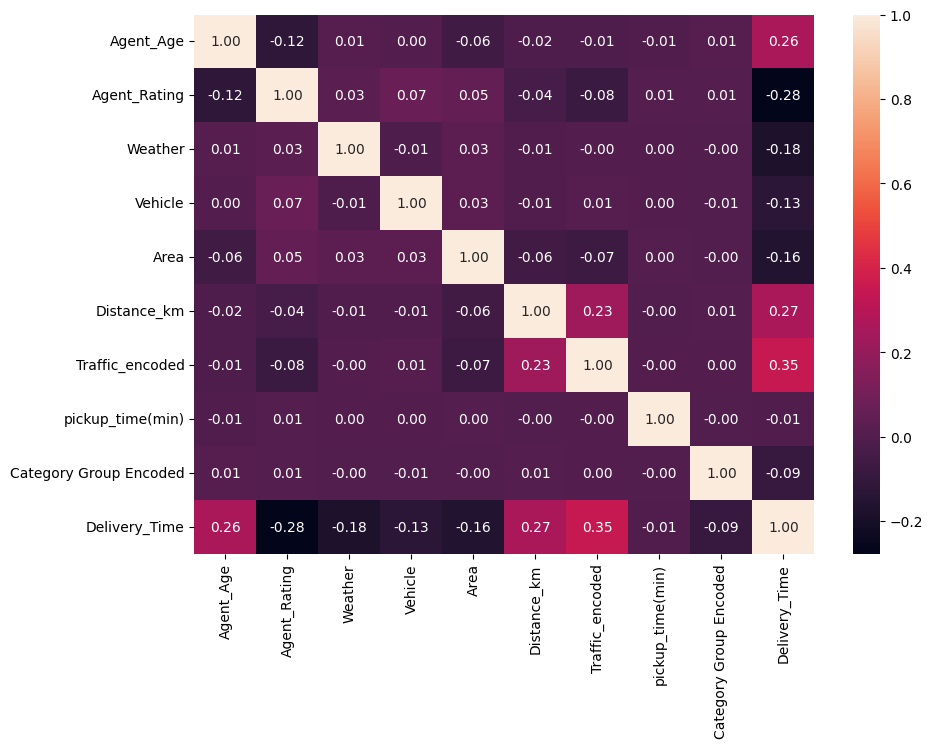

In [ ]:
# heatmap correlation
df_new_train = pd.concat([feature_df_new_train, target_df_new_train], axis=1)
corr = df_new_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_df_new_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['Intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,Intercept,129.426216
1,Agent_Age,39.411618
2,Agent_Rating,-43.651617
3,Weather,-25.594564
4,Vehicle,-18.542650
5,Area,-11.749560
6,Distance_km,33.029686
7,Traffic_encoded,35.409093
8,pickup_time(min),-0.363380
9,Category Group Encoded,-4.656352


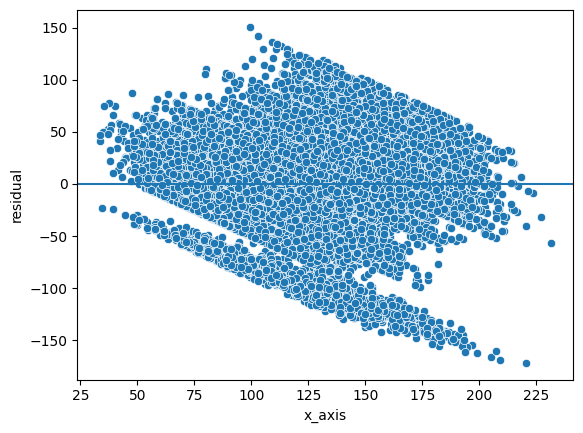

In [ ]:
y_predict_train = multi_reg.predict(X_df_new_train)
residual = y_df_new_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


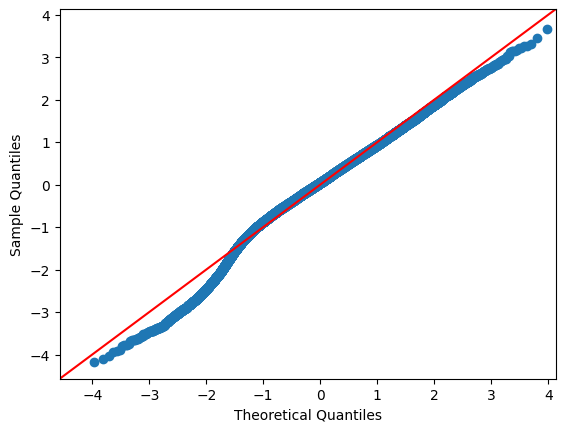

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

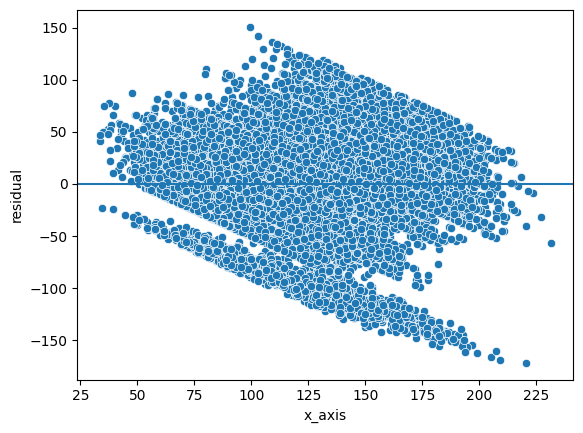

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_df_new_train)
residual = y_df_new_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Membangun model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Anda bisa mencoba beberapa nilai n_estimators
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_rf = rf_model.predict(X_test)

# Menghitung metrik kesalahan untuk Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = (abs((y_test - y_pred_rf) / y_test)).mean() * 100
mean_error_rf = (y_test - y_pred_rf).mean()
mpe_rf = (y_test - y_pred_rf).mean() / y_test.mean() * 100
mae_naive_rf = mean_absolute_error(actual_values, naive_forecast)
mase_rf = mae_rf / mae_naive_rf

# Menampilkan hasil untuk Random Forest
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")
print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"Mean Absolute Percentage Error (Random Forest): {mape_rf}%")
print(f"Mean Error (Random Forest): {mean_error_rf}")
print(f"Mean Percentage Error (Random Forest): {mpe_rf}%")
print(f"Mean Absolute Scaled Error (Random Forest): {mase_rf}")


Root Mean Squared Error (Random Forest): 33.71694266087079
Mean Absolute Error (Random Forest): 24.620102801480694
Mean Absolute Percentage Error (Random Forest): 35.15675346083685%
Mean Error (Random Forest): 1.514144969991426
Mean Percentage Error (Random Forest): 1.221093096366909%
Mean Absolute Scaled Error (Random Forest): 0.4335218898998919


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Membangun model Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Anda bisa mencoba beberapa nilai n_estimators
gbr_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred_gbr = gbr_model.predict(X_test)

# Menghitung metrik kesalahan untuk Gradient Boosting
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mape_gbr = (abs((y_test - y_pred_gbr) / y_test)).mean() * 100
mean_error_gbr = (y_test - y_pred_gbr).mean()
mpe_gbr = (y_test - y_pred_gbr).mean() / y_test.mean() * 100
mae_naive_gbr = mean_absolute_error(actual_values, naive_forecast)
mase_gbr = mae_gbr / mae_naive_gbr

# Menampilkan hasil untuk Gradient Boosting
print(f"Root Mean Squared Error (Gradient Boosting): {rmse_gbr}")
print(f"Mean Absolute Error (Gradient Boosting): {mae_gbr}")
print(f"Mean Absolute Percentage Error (Gradient Boosting): {mape_gbr}%")
print(f"Mean Error (Gradient Boosting): {mean_error_gbr}")
print(f"Mean Percentage Error (Gradient Boosting): {mpe_gbr}%")
print(f"Mean Absolute Scaled Error (Gradient Boosting): {mase_gbr}")


Root Mean Squared Error (Gradient Boosting): 32.89055511073493
Mean Absolute Error (Gradient Boosting): 24.290746050584588
Mean Absolute Percentage Error (Gradient Boosting): 35.97284665964727%
Mean Error (Gradient Boosting): 0.8530953090762469
Mean Percentage Error (Gradient Boosting): 0.6879848449794728%
Mean Absolute Scaled Error (Gradient Boosting): 0.4277224274747723


### Model Comparation

In [ ]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    mape = (abs((y_true - y_pred) / y_true)).mean() * 100
    mean_error = (y_true - y_pred).mean()
    mpe = (y_true - y_pred).mean() / y_true.mean() * 100
    return rmse, mae, mape, mean_error, mpe

# Menyimpan hasil metrik dalam dictionary
results = {}

# Model Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge'] = calculate_metrics(y_test, y_pred_ridge)

# Model Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso'] = calculate_metrics(y_test, y_pred_lasso)

# Model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
results['Linear'] = calculate_metrics(y_test, y_pred_linear)

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = calculate_metrics(y_test, y_pred_rf)

# Model Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
results['Gradient Boosting'] = calculate_metrics(y_test, y_pred_gbr)

# Membuat DataFrame untuk hasil
metrics_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE', 'MAE', 'MAPE (%)', 'Mean Error', 'Mean Percentage Error (%)'])

# Menampilkan tabel
print(metrics_df)

                        RMSE        MAE   MAPE (%)  Mean Error  \
Ridge              40.507830  31.016139  44.642719    0.951412   
Lasso              41.354343  31.867532  46.054650    0.981866   
Linear             40.507642  31.015816  44.641843    0.951361   
Random Forest      33.716943  24.620103  35.156753    1.514145   
Gradient Boosting  32.890555  24.290746  35.972847    0.853095   

                   Mean Percentage Error (%)  
Ridge                               0.767273  
Lasso                               0.791833  
Linear                              0.767232  
Random Forest                       1.221093  
Gradient Boosting                   0.687985  


In [ ]:
metrics_df

,RMSE,MAE,MAPE (%),Mean Error,Mean Percentage Error (%)
Ridge,40.507830,31.016139,44.642719,0.951412,0.767273
Lasso,41.354343,31.867532,46.054650,0.981866,0.791833
Linear,40.507642,31.015816,44.641843,0.951361,0.767232
Random Forest,33.716943,24.620103,35.156753,1.514145,1.221093
Gradient Boosting,32.890555,24.290746,35.972847,0.853095,0.687985


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter yang akan dicari
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menggunakan RandomizedSearchCV untuk mencari kombinasi terbaik
random_search = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Melatih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", -random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.2}
Best cross-validation score:  1106.0231402272118


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 32.05567683162359


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Actual Vs Predicted

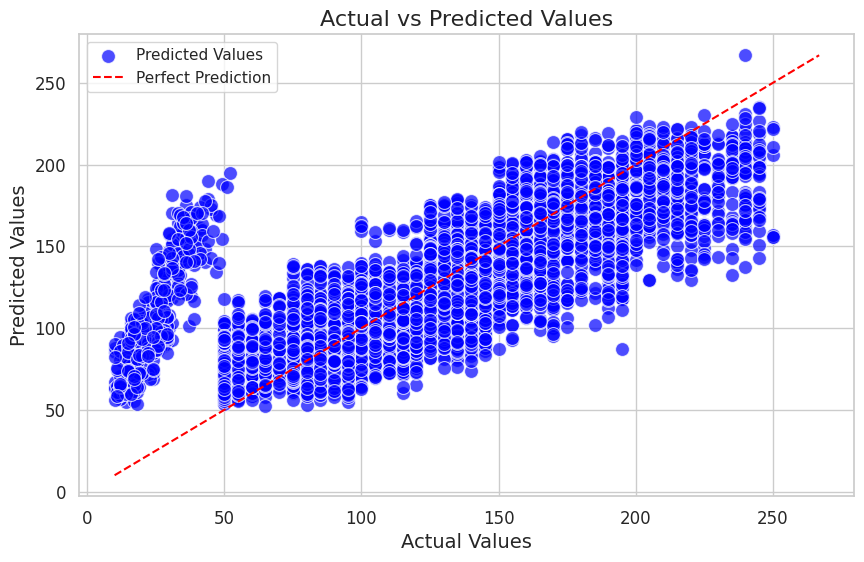

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


plt.figure(figsize=(10, 6))


sns.set(style="whitegrid")


sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', s=100, label='Predicted Values', alpha=0.7)


min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')


plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)


plt.show()

### Feature Importance

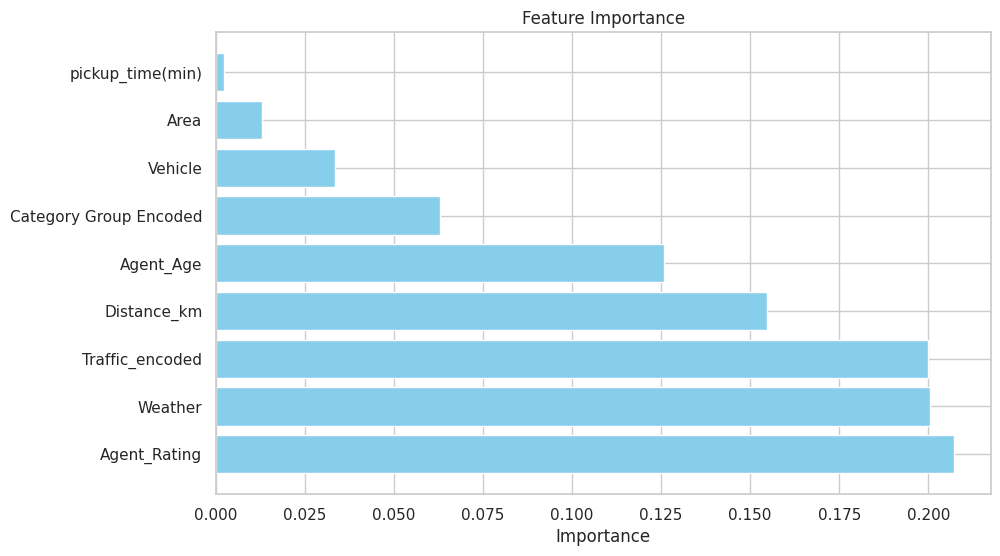

In [ ]:
feature_importance = model.feature_importances_

# Jika X_train masih berupa DataFrame, maka kita bisa langsung menggunakan X_train.columns
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Urutkan berdasarkan nilai importance terbesar
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
print(importance_df)

     Feature  Importance
1  feature_1    0.207143
2  feature_2    0.200606
6  feature_6    0.199855
5  feature_5    0.154845
0  feature_0    0.125850
8  feature_8    0.062872
3  feature_3    0.033560
4  feature_4    0.012959
7  feature_7    0.002309


### Evaluation

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung MSE, RMSE, dan MAE untuk data latih
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)

# Menghitung MSE, RMSE, dan MAE untuk data uji
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

# Menampilkan hasil
print("Result for the Train data:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")

print("\nResult for teh test data:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")

Result for the Train data:
MSE: 1010.5487541558887
RMSE: 31.78912949666739
MAE: 23.225458567613106

Result for teh test data:
MSE: 1027.5664171334895
RMSE: 32.05567683162359
MAE: 23.54397946745214


Root Mean Square Error = 32 minutes